In [103]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [104]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
y = sc.fit_transform(y.reshape(-1,1))

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [108]:
from sklearn.svm import SVR
reg = SVR()
reg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [109]:
reg.score(x_test,y_test)

0.9466019139843265

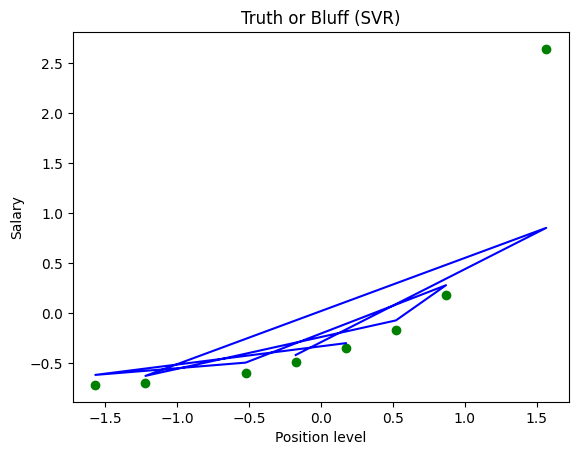

In [117]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()